In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

## Loading the network

In [2]:
from sclibrary.io.network_reader import read_B1, read_B2, read_coordinates
import pandas as pd
import numpy as np


B1_dataset_path = "data/test_dataset/B1_chicago_sketch.csv"
B2_dataset_path = "data/test_dataset/B2t_chicago_sketch.csv"


# read sc
scbuilder = read_B1(B1_dataset_path)
edges = np.asarray(scbuilder.edges)
triangles = read_B2(B2_dataset_path, edges=edges)
sc = scbuilder.to_simplicial_complex(triangles=triangles)

# read coordinates
coordinates_path = "data/test_dataset/coordinates_chicago_sketch.csv"
coordinates = read_coordinates(coordinates_path, node_id_col="Id", x_col="X", y_col="Y", delimeter=",", start_index_zero=True)

# read flow
flow_path = "data/test_dataset/flow_chicago_sketch.csv"
flow = pd.read_csv(flow_path, delimiter=",", header=None).to_numpy().flatten()

In [3]:
print("Nodes", len(sc.nodes))
print("Edges", len(sc.edges))
print("Triangles", len(sc.triangles))
print("Coordinates", len(coordinates))
print("Flow", len(flow))

Nodes 546
Edges 1088
Triangles 112
Coordinates 546
Flow 1088


## Plotting

In [4]:
import matplotlib.pyplot as plt
from sclibrary import SCPlot

scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


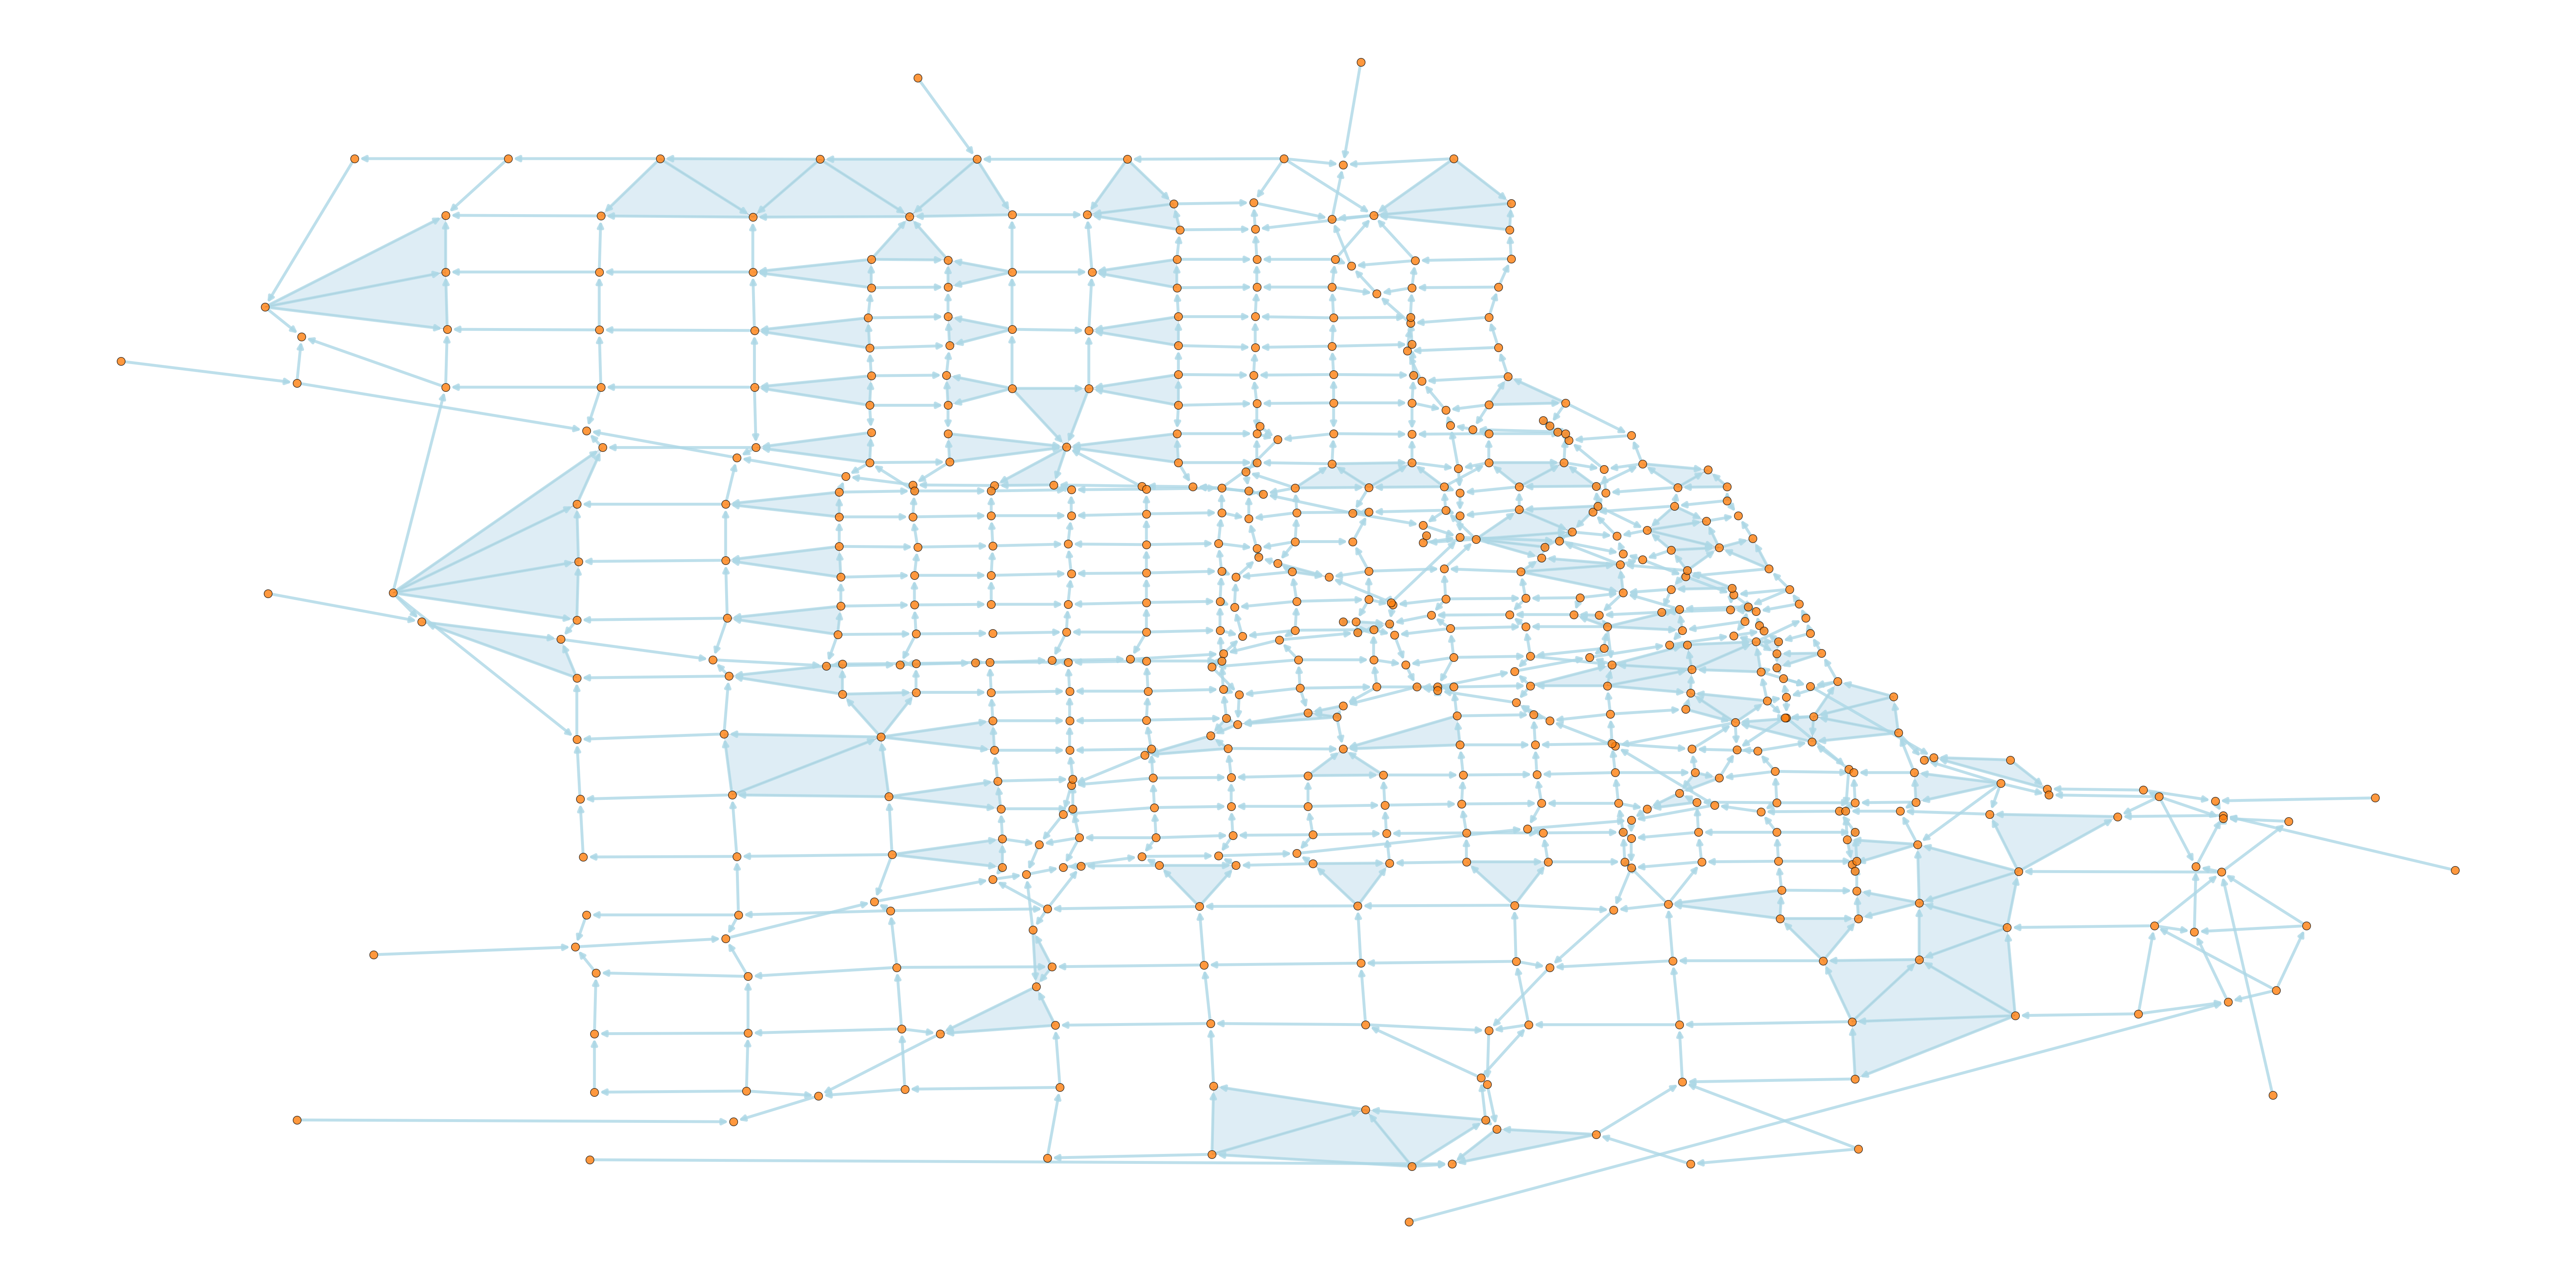

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(80, 40))
scplot.draw_network(with_labels=False, node_size=200, arrowsize=20, ax=ax)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


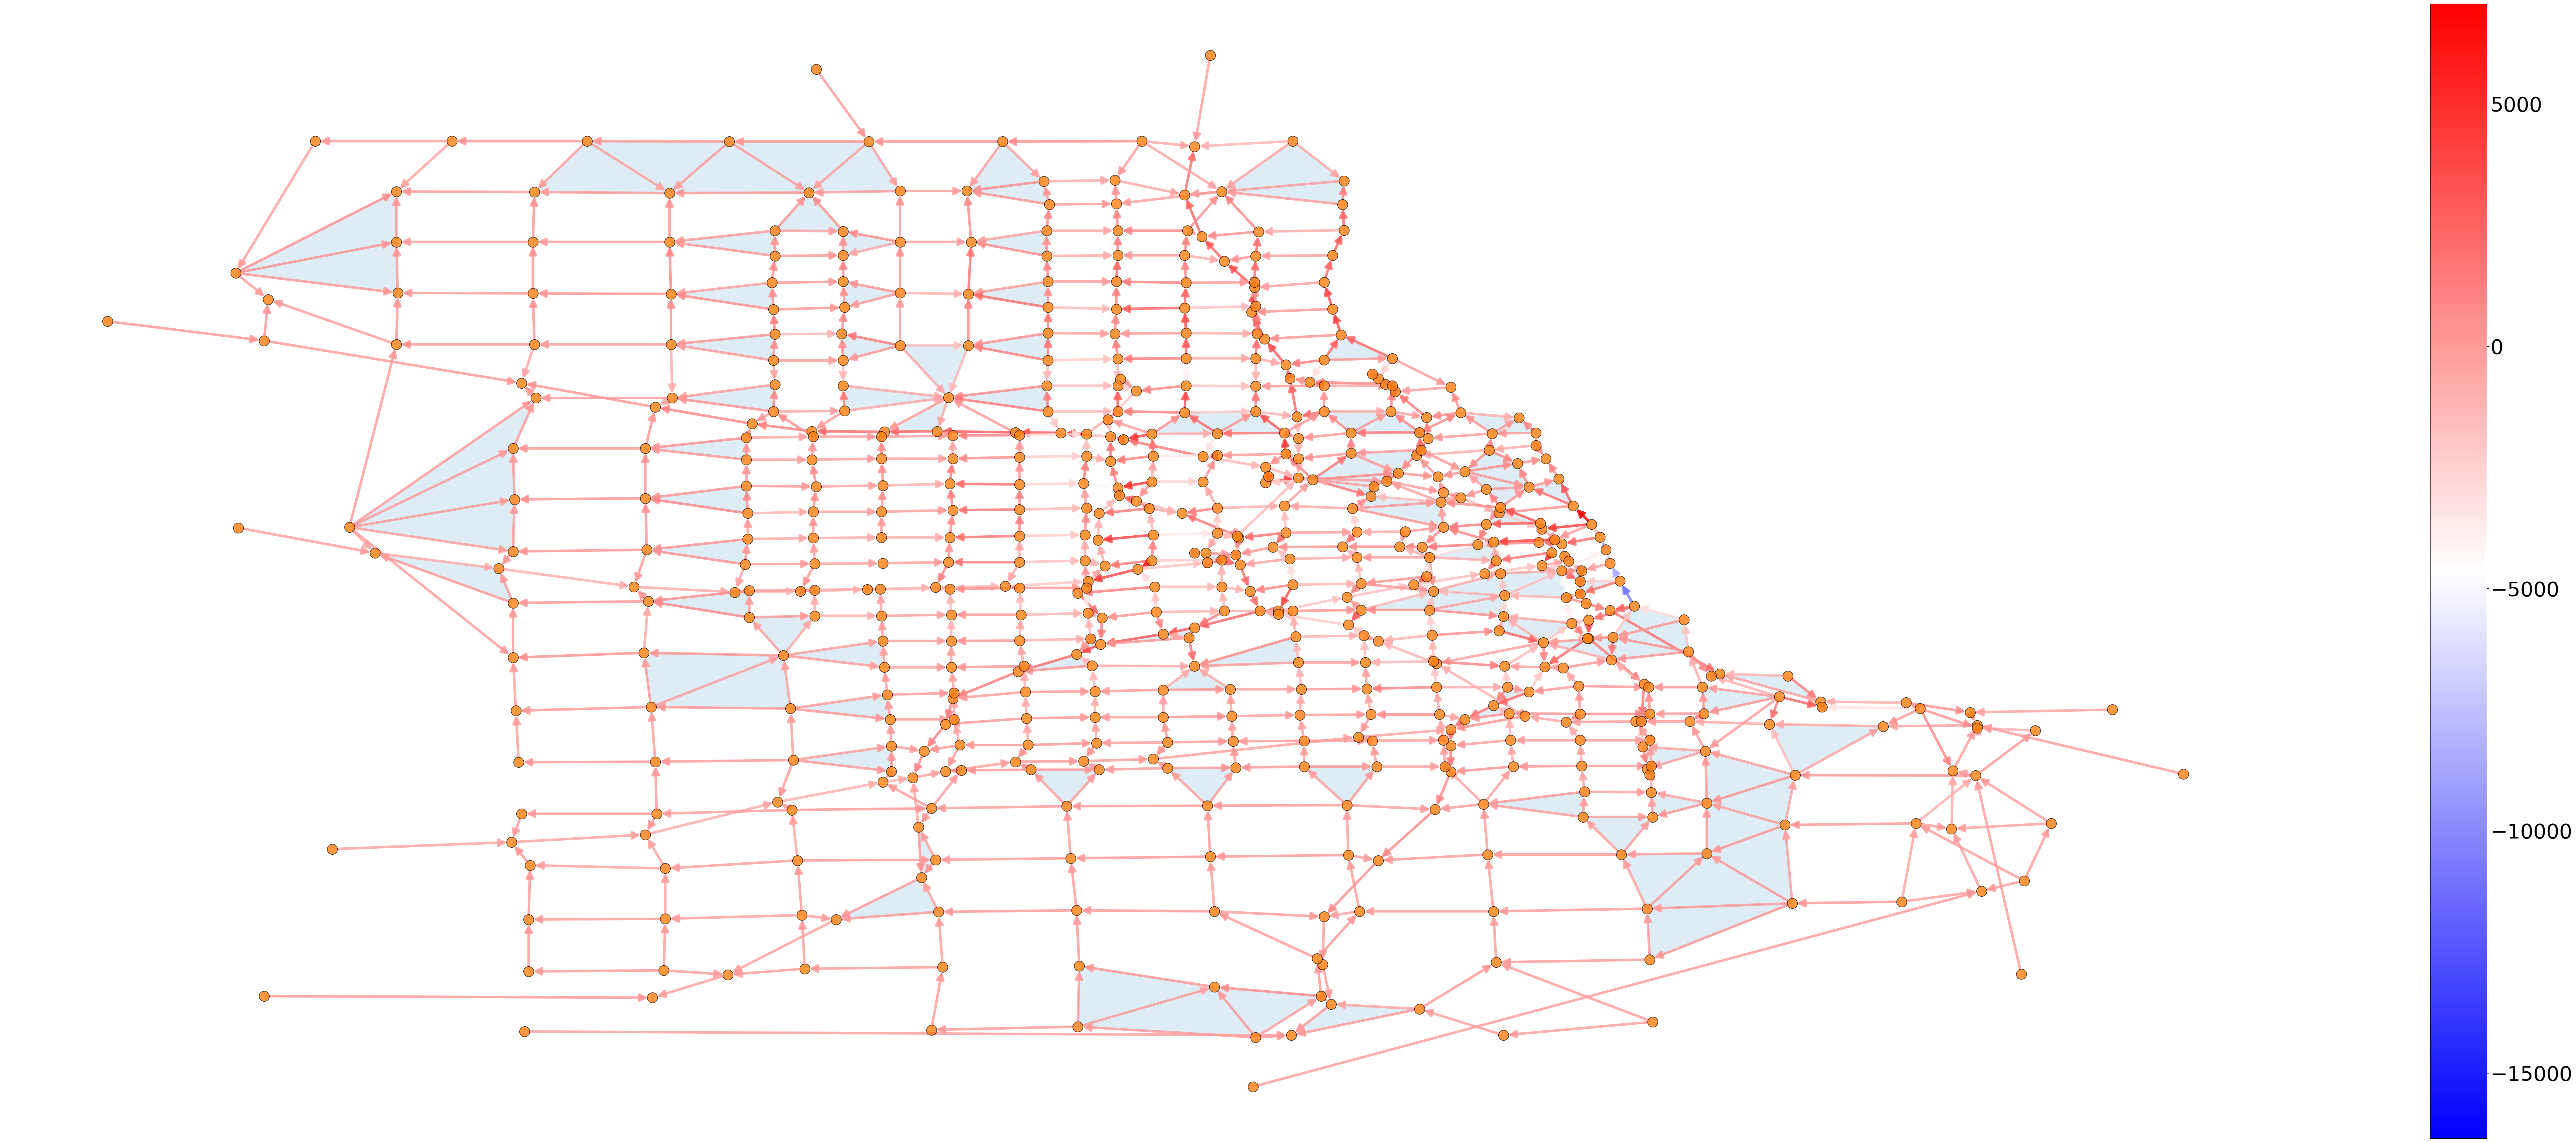

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(100, 40))
scplot.draw_network(edge_flow=flow, with_labels=False, ax=ax)

## Filters

### Edge flow denoising

In [7]:
from sclibrary.filters import EdgeFlowDenoising

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
mu_vals = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
efd.denoise(f=flow, f_true=flow, p_choice="L1", mu_vals=mu_vals)

f_est_L1 = efd.history["f_estimated"]
print("Error:", efd.calculate_error(f_est_L1, flow))

mu: 0.1, error: 0.08944932519293305
mu: 0.2, error: 0.14197967623263685
mu: 0.5, error: 0.22961122177557575
mu: 1, error: 0.30190256361813755
mu: 2, error: 0.37301037633844375
mu: 5, error: 0.46211599052482105
mu: 10, error: 0.5308907534483601
mu: 20, error: 0.6071654142613296
mu: 50, error: 0.7114077775146073
mu: 100, error: 0.7757333916999843
Error: 0.7757333916999843


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


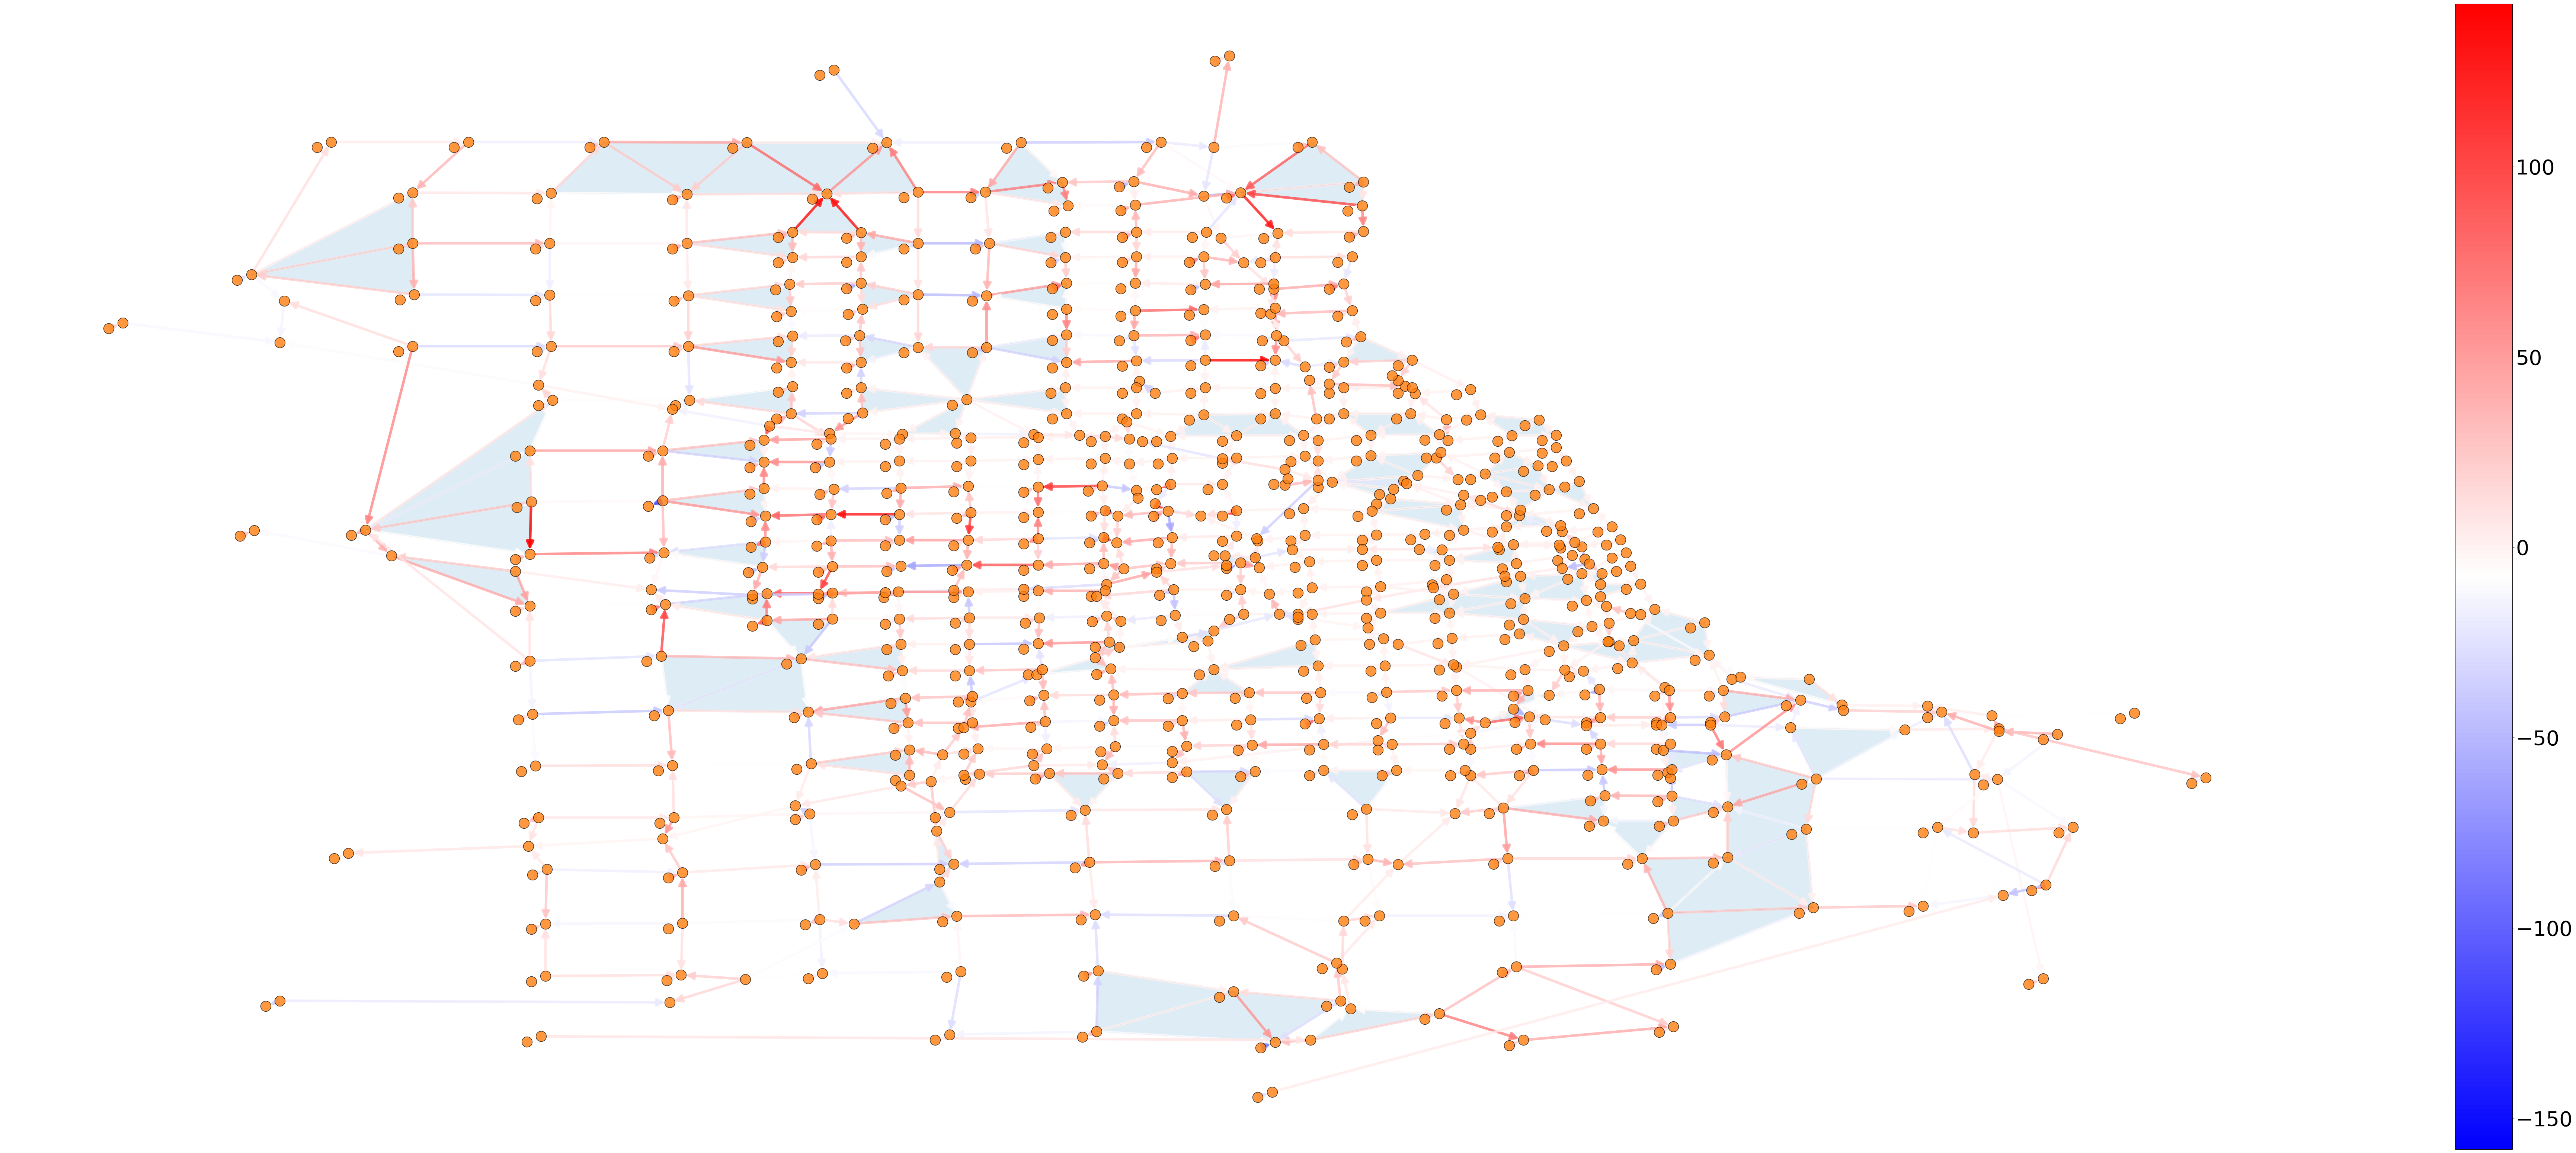

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(100, 40))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), with_labels=False, ax=ax)

### LS Filter Design

In [8]:
from sclibrary.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I

In [9]:
filter_size = 10

lsfilter.subcomponent_extraction_type_one(
   f=flow, component="gradient", L=filter_size,
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.history["extracted_component_error"][-1])

Filter size: 0 - Error: 0.5769257123944498
Filter size: 1 - Error: 0.7647059947638218
Filter size: 2 - Error: 0.7991692484418758
Filter size: 3 - Error: 0.7988553330561033
Filter size: 4 - Error: 0.7780263603481635
Filter size: 5 - Error: 0.7398538634067515
Filter size: 6 - Error: 0.7067077348956308
Filter size: 7 - Error: 0.6855500814627371
Filter size: 8 - Error: 0.6730892951823304
Filter size: 9 - Error: 0.6536349601524363
Error: 0.6536349601524363


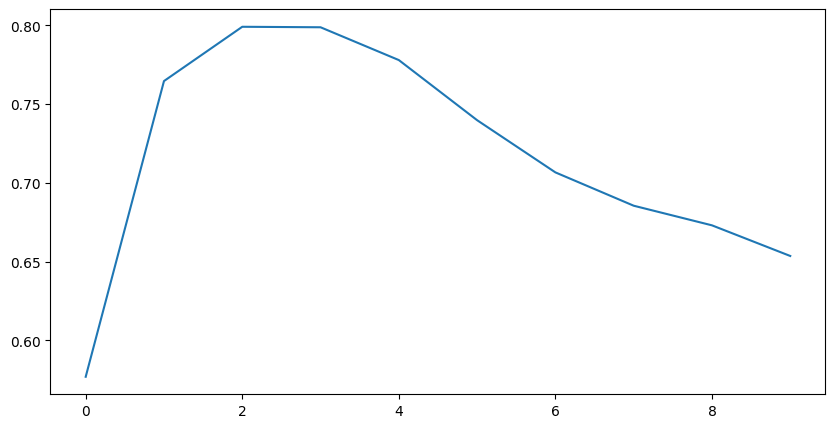

In [10]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(lsfilter.history["extracted_component_error"])

#### Subcomponent extraction type II

In [11]:
filter_size = 15

lsfilter.subcomponent_extraction_type_two(
    f=flow, component="gradient", L=filter_size
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.history["extracted_component_error"][-1])

Filter size: 0 - Error: 0.5767144015454567
Filter size: 1 - Error: 0.573341015165275
Filter size: 2 - Error: 0.5681635016856335
Filter size: 3 - Error: 0.5617014670848276
Filter size: 4 - Error: 0.5530710790521312
Filter size: 5 - Error: 0.5426445621099073
Filter size: 6 - Error: 0.531132357082604
Filter size: 7 - Error: 0.5188161033277757
Filter size: 8 - Error: 0.505916414830008
Filter size: 9 - Error: 0.49270471801826116
Filter size: 10 - Error: 0.4786555269352404
Filter size: 11 - Error: 0.4633700169879695
Filter size: 12 - Error: 0.5304879832614559
Filter size: 13 - Error: 0.5392758817269879
Filter size: 14 - Error: 0.8944265988016388
Error: 0.8944265988016388


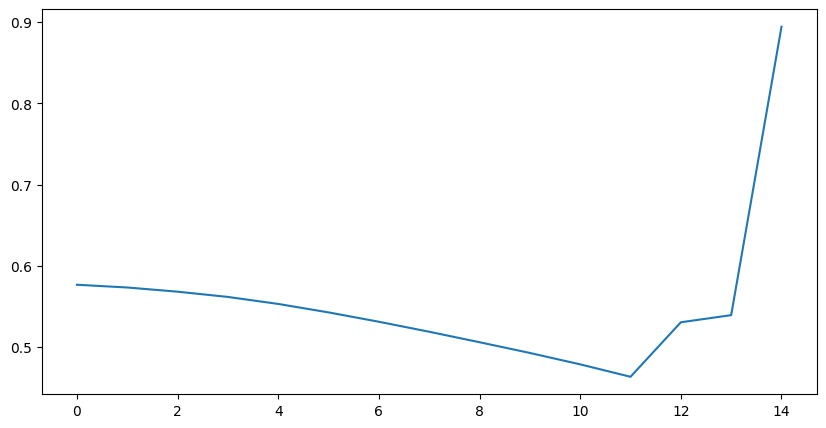

In [12]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(lsfilter.history["extracted_component_error"])

### Grid-based filter design

In [13]:
from sclibrary.filters import GridBasedFilterDesign

gridfilter = GridBasedFilterDesign(simplicial_complex=sc)

In [14]:
filter_size = 10

gridfilter.subcomponent_extraction(f=flow, f_true=flow, p_choice="L1L", component="gradient", L=filter_size)

Filter size: 0 - Error: 0.4990808823529418
Filter size: 1 - Error: 1.0855247824718313
Filter size: 2 - Error: 1.1389939424212112
Filter size: 3 - Error: 1.0409636089442205
Filter size: 4 - Error: 0.9052904741290893
Filter size: 5 - Error: 0.8561881932878052
Filter size: 6 - Error: 1.0325346348452533
Filter size: 7 - Error: 1.1346659963944739
Filter size: 8 - Error: 0.967756923959749
Filter size: 9 - Error: 0.855765374897782


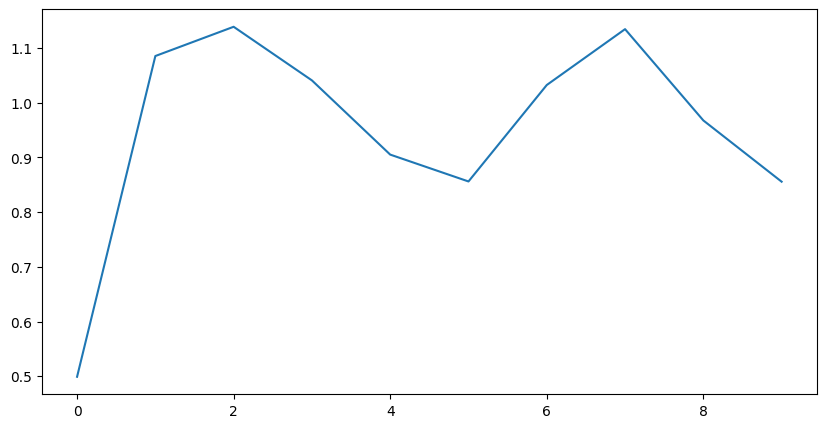

In [15]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(gridfilter.history["extracted_component_error"])

### Chebyshev filter design

In [16]:
from sclibrary.filters import ChebyshevFilterDesign

chebfilter = ChebyshevFilterDesign(simplicial_complex=sc)

In [17]:
filter_size = 20

chebfilter.apply(f=flow, p_choice="L1", component="gradient", L=filter_size)

Applying Chebyshev filter
Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximation for k = 17...
Calculating Ch

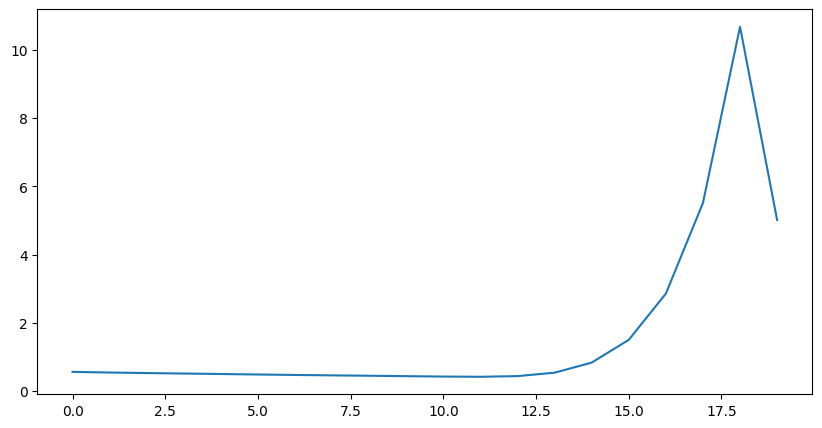

In [18]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(chebfilter.history["extracted_component_error"])